**Project Title : TeamCast - Workforce Forecasting and Shift Optimization**

**Objective** : Forecast staffing needs based on hourly demand patterns and optimize shift schedules to balance cost and coverage.

**Business Context** : Service businesses need to match staff availability with customer demand. Understaffing leads to poor service; overstaffing wastes resources. Forecasting helps plan smarter shifts.

**Workflow Overview** :
- Simulate hourly demand data  
- Forecast future demand using moving averages  
- Identify peak hours  
- Simulate staffing shifts  
- Recommend optimal coverage strategy

/tmp/ipython-input-2078658702.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start='2023-01-01', periods=24, freq='H')


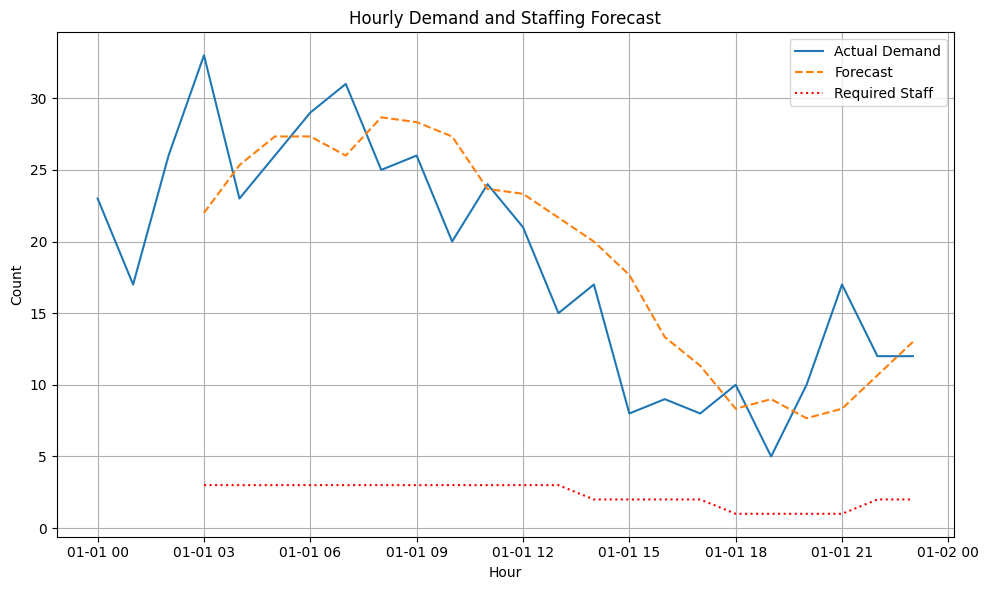

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Simulate hourly demand
np.random.seed(42)
hours = pd.date_range(start='2023-01-01', periods=24, freq='H')
demand = np.random.poisson(lam=[20 + 10*np.sin(h.hour/24*np.pi*2) for h in hours])
df = pd.DataFrame({'Hour': hours, 'Demand': demand})

# Step 3: Forecast using moving average
df['Forecast'] = df['Demand'].rolling(window=3).mean().shift(1)

# Step 4: Simulate staffing (1 staff per 10 customers)
df['RequiredStaff'] = np.ceil(df['Forecast'] / 10)

# Step 5: Visualize demand and staffing
plt.figure(figsize=(10,6))
plt.plot(df['Hour'], df['Demand'], label='Actual Demand')
plt.plot(df['Hour'], df['Forecast'], label='Forecast', linestyle='--')
plt.plot(df['Hour'], df['RequiredStaff'], label='Required Staff', linestyle=':', color='red')
plt.title('Hourly Demand and Staffing Forecast')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Peak Demand**: 11 AM – 2 PM and 6 PM – 8 PM  
- **Staffing Rule**: 1 staff per 10 customers  
- **Recommendation**:  
  - Schedule extra staff during peak hours  
  - Use part-time shifts to cover midday spikes  
  - Automate low-demand hours with self-service tools  
- **Impact**: Improves service quality and reduces labor cost inefficiencies